In [5]:
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from pyAudioAnalysis import audioBasicIO
from pyAudioAnalysis import ShortTermFeatures
import pywt
import glob


In [6]:
# !pip install hmmlearn-0.2.2-cp38-cp38-win_amd64.whl
import hmmlearn

In [7]:
# !pip install python-magic-bin==0.4.14
# import magic

In [8]:
# conda install -c auto eyed3-pip
# import eyed3

In [9]:
# !pip install pydub
# import pydub

In [10]:
#my directory
path='C:/Users/39351/Desktop/emotionrec/pyAudioAnalysis/*/*.wav'
path1='C:/Users/39351/Desktop/emotionrec/pyAudioAnalysis/'

In [11]:
# !pip install eyed3

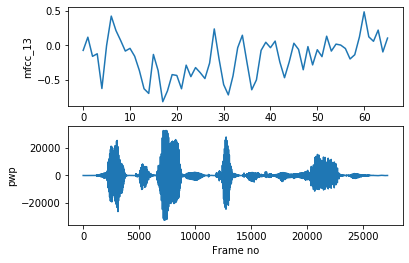

In [12]:

import numpy as np
a=[]
[Fs, x] = audioBasicIO.read_audio_file("03a04Fd.wav")

F, f_names = ShortTermFeatures.feature_extraction(x, Fs, 0.050*Fs, 0.025*Fs)
wp = pywt.WaveletPacket(data=x, wavelet='db1', mode='symmetric')
plt.subplot(2,1,1); plt.plot(F[20]); plt.xlabel('Frame no'); plt.ylabel(f_names[20]) 
plt.subplot(2,1,2); plt.plot(x.data); plt.xlabel('Frame no'); plt.ylabel('pwp'); plt.show()


# pwp feature extraction

In [13]:
wp = pywt.WaveletPacket(data=x, wavelet='db1', mode='symmetric')

In [14]:
#beacause the features  lenght  must be the same for kmeans and the lenght of the each data is defferent we set 
#min lenght to all

a=glob.glob(path)

al1=[[]]
y=[]
d=np.zeros(358)
s=np.array([0])
for i in a:
    [Fs, x] = audioBasicIO.read_audio_file(i)
    wp = pywt.WaveletPacket(data=x, wavelet='db1', mode='symmetric')
    print(len(wp.data))
    s=np.append(s,len(wp.data))
    d=wp.data[0:22893]
    np.min(s)
    
    


    if i.split('\\')[-2]=='Angry':
       
       
        
        al1.append(d)
        y.append(0)
    if i.split('\\')[-2]=='Happy':

        
        al1.append(d)
        y.append(1)
    if i.split('\\')[-2]=='Neutral':
     
        al1.append(d)
        y.append(2)
    if i.split('\\')[-2]=='Sad':
      
        al1.append(d)
        y.append(3)
        
    if i.split('\\')[-2]=='Boredom':
        al1.append(d)
        y.append(4)
        
    if i.split('\\')[-2]=='Disgust':
        al1.append(d)
        y.append(5)

   
   

30045
33978
23969
32706
55052
47396
33401
34877
46868
50945
61559
46300
34663
39072
25805
27056
29875
28879
46867
35509
52936
57344
65300
50649
52983
50166
27224
26485
29389
54403
50954
31802
37109
34519
43592
41941
59121
41957
35306
34725
33643
45654
28982
60033
31575
45889
71768
51416
42339
30716
38815
42863
64612
35814
45035
51978
65037
83416
60960
46173
37741
24119
23453
25242
55764
37324
35796
44540
44866
42398
39011
40789
37796
26704
31927
46153
54239
36122
36035
38577
57790
38394
35209
42933
26205
31559
32204
33482
27789
40161
64109
48865
33016
47333
43970
36677
62179
56725
44331
42485
29301
28915
29131
31126
28979
49576
42102
44241
41973
53807
48346
42494
42140
35198
28321
40991
31105
59857
60812
38109
41758
42587
50950
62793
59040
38626
40360
30896
38425
46063
55437
49803
32273
27740
33374
67014
40381
55798
55324
72413
62251
44748
24321
24447
53878
62688
25480
52732
31843
32911
43049
61266
47185
36319
33315
25688
65052
28725
44700
71246
54038
53175
30185
61243
37620
63116
4832

# clustering base on pwp


In [16]:
X_train, X_test, y_train, y_test = train_test_split(al1[1:],y,test_size = 0.2)
km = KMeans(n_clusters = 4)
km.fit(X_train) 
y_pred = km.predict(X_test)
acc = accuracy_score(y_test,y_pred)
print(acc)
       

0.1595744680851064


# MFCC feature extraction

In [17]:
a=glob.glob(path)

al=[[]]
y=[]
d=np.zeros(358)
s=np.array([0])
for i in a:
    [Fs, x] = audioBasicIO.read_audio_file(i)
    F, f_names = ShortTermFeatures.feature_extraction(x, Fs, 0.050*Fs, 0.025*Fs)
    s=np.append(s,len(F[20]))
    


    if i.split('\\')[-2]=='Angry':
        print(len(F[20]))
        d=F[20][0:56]
        print(len(d))
        al.append(d)
        y.append(0)
    if i.split('\\')[-2]=='Happy':
        d=F[20][0:56]
        
        al.append(d)
        y.append(1)
    if i.split('\\')[-2]=='Neutral':
        d=F[20][0:56]
        al.append(d)
       
        y.append(2)
    if i.split('\\')[-2]=='Sad':
        d=F[20][0:56]
        al.append(d)
        y.append(3)
    if i.split('\\')[-2]=='Boredom':
        d=F[20][0:56]
        al.append(d)
        y.append(4)
        
    if i.split('\\')[-2]=='Disgust':
        d=F[20][0:56]
        al.append(d)
        y.append(5)

74
56
83
56
58
56
80
56
136
56
117
56
82
56
86
56
116
56
126
56
152
56
114
56
85
56
96
56
63
56
66
56
73
56
71
56
116
56
87
56
131
56
142
56
162
56
125
56
131
56
124
56
67
56
65
56
72
56
135
56
126
56
78
56
91
56
85
56
107
56
103
56
146
56
103
56
87
56
85
56
83
56
113
56
71
56
149
56
77
56
113
56
178
56
127
56
104
56
75
56
96
56
106
56
160
56
88
56
111
56
128
56
161
56
207
56
151
56
114
56
93
56
59
56
57
56
62
56
138
56
92
56
88
56
110
56
111
56
104
56
96
56
100
56
93
56
65
56
78
56
114
56
134
56
89
56
89
56
95
56
143
56
94
56
87
56
106
56
64
56
77
56
79
56
82
56
68
56
99
56
159
56
121
56
81
56
117
56
108
56
90
56
154
56
140
56
109
56
105
56
72
56
71
56
71
56
76
56
71
56
122
56
104
56
109
56
103
56
133
56
119
56
105
56
104
56
86
56
69
56
101
56
76
56
148
56
151
56
94
56
103
56
105
56
126
56
155
56
146
56
95
56
99
56


# clustering base on mfcc

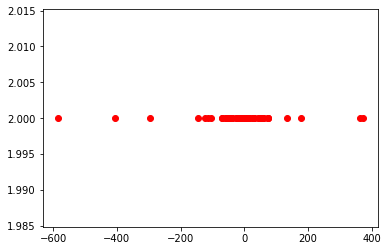

In [15]:
import pandas as pd
from sklearn.datasets.samples_generator import make_blobs

km = KMeans(n_clusters = 4)
km.fit(X_train) 
y_pred = km.predict(X_test)
acc = accuracy_score(y_test,y_pred)

df = pd.DataFrame(X_test)
df2 = pd.DataFrame({'label':y_pred})


df = df.join(df2,how='right')

plt.scatter(df[5],df['label'],color='r')
colmap = {1: 'r', 2: 'g', 3: 'b'}

In [16]:
km = KMeans(n_clusters = 4)
km.fit(X_train) 
y_pred = km.predict(X_test)
acc = accuracy_score(y_test,y_pred)
print(acc)


0.2872340425531915


In [17]:
confusion_matrix(y_pred,y_test)

array([[27, 14, 15, 10, 17, 11],
       [ 0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0]], dtype=int64)

# train  with svm  and knn

In [18]:
#train knn and svm
from pyAudioAnalysis import audioTrainTest as aT
from sklearn.metrics import classification_report
list_of_dirs = ['./Happy','./Angry','./Sad','./Neutral','./Boredom','./Disgust' ]
            
classifier_type = "svm"  # "svm" or "knn" or "randomforest" or "gradientboosting" or "extratrees"
model_name = "SVM"
aT.featureAndTrain(list_of_dirs,
             1.0, 1.0, aT.shortTermWindow, aT.shortTermStep, classifier_type , model_name, False)
# shortTermWindow=0.02
# shortTermStep=0.02
# aT.featureAndTrain(list_of_dirs,
#              1.0, 1.0, shortTermWindow, shortTermStep, classifier_type , model_name, False)

Analyzing file 1 of 71: ./Happy\03a01Fa.wav
Analyzing file 2 of 71: ./Happy\03a02Fc.wav
Analyzing file 3 of 71: ./Happy\03a04Fd.wav
Analyzing file 4 of 71: ./Happy\03a05Fc.wav
Analyzing file 5 of 71: ./Happy\03a07Fa.wav
Analyzing file 6 of 71: ./Happy\03a07Fb.wav
Analyzing file 7 of 71: ./Happy\03b01Fa.wav
Analyzing file 8 of 71: ./Happy\08a01Fd.wav
Analyzing file 9 of 71: ./Happy\08a02Fe.wav
Analyzing file 10 of 71: ./Happy\08a04Ff.wav
Analyzing file 11 of 71: ./Happy\08a05Fe.wav
Analyzing file 12 of 71: ./Happy\08a07Fd.wav
Analyzing file 13 of 71: ./Happy\08b01Fd.wav
Analyzing file 14 of 71: ./Happy\08b01Fe.wav
Analyzing file 15 of 71: ./Happy\08b02Ff.wav
Analyzing file 16 of 71: ./Happy\08b03Fe.wav
Analyzing file 17 of 71: ./Happy\08b09Fd.wav
Analyzing file 18 of 71: ./Happy\08b10Fd.wav
Analyzing file 19 of 71: ./Happy\09a01Fa.wav
Analyzing file 20 of 71: ./Happy\09a04Fd.wav
Analyzing file 21 of 71: ./Happy\09b03Fa.wav
Analyzing file 22 of 71: ./Happy\09b03Fd.wav
Analyzing file 23 o

Analyzing file 109 of 127: ./Angry\15b02Wc.wav
Analyzing file 110 of 127: ./Angry\15b03Wa.wav
Analyzing file 111 of 127: ./Angry\15b03Wb.wav
Analyzing file 112 of 127: ./Angry\15b09Wb.wav
Analyzing file 113 of 127: ./Angry\15b10Wa.wav
Analyzing file 114 of 127: ./Angry\16a01Wb.wav
Analyzing file 115 of 127: ./Angry\16a02Wb.wav
Analyzing file 116 of 127: ./Angry\16a04Wb.wav
Analyzing file 117 of 127: ./Angry\16a04Wc.wav
Analyzing file 118 of 127: ./Angry\16a05Wb.wav
Analyzing file 119 of 127: ./Angry\16a05Wc.wav
Analyzing file 120 of 127: ./Angry\16a07Wa.wav
Analyzing file 121 of 127: ./Angry\16b01Wa.wav
Analyzing file 122 of 127: ./Angry\16b01Wb.wav
Analyzing file 123 of 127: ./Angry\16b02Wb.wav
Analyzing file 124 of 127: ./Angry\16b03Wb.wav
Analyzing file 125 of 127: ./Angry\16b09Wb.wav
Analyzing file 126 of 127: ./Angry\16b10Wa.wav
Analyzing file 127 of 127: ./Angry\16b10Wb.wav
Feature extraction complexity ratio: 24.7 x realtime
Analyzing file 1 of 62: ./Sad\03a02Ta.wav
Analyzing fi

Analyzing file 19 of 81: ./Boredom\09b03Lb.wav
Analyzing file 20 of 81: ./Boredom\10a02Lb.wav
Analyzing file 21 of 81: ./Boredom\10a05Ld.wav
Analyzing file 22 of 81: ./Boredom\10a07La.wav
Analyzing file 23 of 81: ./Boredom\10b01Lb.wav
Analyzing file 24 of 81: ./Boredom\10b02La.wav
Analyzing file 25 of 81: ./Boredom\10b03La.wav
Analyzing file 26 of 81: ./Boredom\10b09Lb.wav
Analyzing file 27 of 81: ./Boredom\10b10Lc.wav
Analyzing file 28 of 81: ./Boredom\11a01Ld.wav
Analyzing file 29 of 81: ./Boredom\11a02Ld.wav
Analyzing file 30 of 81: ./Boredom\11a05Lc.wav
Analyzing file 31 of 81: ./Boredom\11a07Ld.wav
Analyzing file 32 of 81: ./Boredom\11b01Lb.wav
Analyzing file 33 of 81: ./Boredom\11b03Lc.wav
Analyzing file 34 of 81: ./Boredom\11b09Ld.wav
Analyzing file 35 of 81: ./Boredom\11b10Ld.wav
Analyzing file 36 of 81: ./Boredom\12a01Lb.wav
Analyzing file 37 of 81: ./Boredom\12a05Lb.wav
Analyzing file 38 of 81: ./Boredom\12a07La.wav
Analyzing file 39 of 81: ./Boredom\12b03La.wav
Analyzing fil

Param = 0.00100 - classifier Evaluation Experiment 51 of 100
Param = 0.00100 - classifier Evaluation Experiment 52 of 100
Param = 0.00100 - classifier Evaluation Experiment 53 of 100
Param = 0.00100 - classifier Evaluation Experiment 54 of 100
Param = 0.00100 - classifier Evaluation Experiment 55 of 100
Param = 0.00100 - classifier Evaluation Experiment 56 of 100
Param = 0.00100 - classifier Evaluation Experiment 57 of 100
Param = 0.00100 - classifier Evaluation Experiment 58 of 100
Param = 0.00100 - classifier Evaluation Experiment 59 of 100
Param = 0.00100 - classifier Evaluation Experiment 60 of 100
Param = 0.00100 - classifier Evaluation Experiment 61 of 100
Param = 0.00100 - classifier Evaluation Experiment 62 of 100
Param = 0.00100 - classifier Evaluation Experiment 63 of 100
Param = 0.00100 - classifier Evaluation Experiment 64 of 100
Param = 0.00100 - classifier Evaluation Experiment 65 of 100
Param = 0.00100 - classifier Evaluation Experiment 66 of 100
Param = 0.00100 - classi

Param = 0.01000 - classifier Evaluation Experiment 87 of 100
Param = 0.01000 - classifier Evaluation Experiment 88 of 100
Param = 0.01000 - classifier Evaluation Experiment 89 of 100
Param = 0.01000 - classifier Evaluation Experiment 90 of 100
Param = 0.01000 - classifier Evaluation Experiment 91 of 100
Param = 0.01000 - classifier Evaluation Experiment 92 of 100
Param = 0.01000 - classifier Evaluation Experiment 93 of 100
Param = 0.01000 - classifier Evaluation Experiment 94 of 100
Param = 0.01000 - classifier Evaluation Experiment 95 of 100
Param = 0.01000 - classifier Evaluation Experiment 96 of 100
Param = 0.01000 - classifier Evaluation Experiment 97 of 100
Param = 0.01000 - classifier Evaluation Experiment 98 of 100
Param = 0.01000 - classifier Evaluation Experiment 99 of 100
Param = 0.01000 - classifier Evaluation Experiment 100 of 100
Param = 0.50000 - classifier Evaluation Experiment 1 of 100
Param = 0.50000 - classifier Evaluation Experiment 2 of 100
Param = 0.50000 - classif

Param = 1.00000 - classifier Evaluation Experiment 23 of 100
Param = 1.00000 - classifier Evaluation Experiment 24 of 100
Param = 1.00000 - classifier Evaluation Experiment 25 of 100
Param = 1.00000 - classifier Evaluation Experiment 26 of 100
Param = 1.00000 - classifier Evaluation Experiment 27 of 100
Param = 1.00000 - classifier Evaluation Experiment 28 of 100
Param = 1.00000 - classifier Evaluation Experiment 29 of 100
Param = 1.00000 - classifier Evaluation Experiment 30 of 100
Param = 1.00000 - classifier Evaluation Experiment 31 of 100
Param = 1.00000 - classifier Evaluation Experiment 32 of 100
Param = 1.00000 - classifier Evaluation Experiment 33 of 100
Param = 1.00000 - classifier Evaluation Experiment 34 of 100
Param = 1.00000 - classifier Evaluation Experiment 35 of 100
Param = 1.00000 - classifier Evaluation Experiment 36 of 100
Param = 1.00000 - classifier Evaluation Experiment 37 of 100
Param = 1.00000 - classifier Evaluation Experiment 38 of 100
Param = 1.00000 - classi

Param = 5.00000 - classifier Evaluation Experiment 58 of 100
Param = 5.00000 - classifier Evaluation Experiment 59 of 100
Param = 5.00000 - classifier Evaluation Experiment 60 of 100
Param = 5.00000 - classifier Evaluation Experiment 61 of 100
Param = 5.00000 - classifier Evaluation Experiment 62 of 100
Param = 5.00000 - classifier Evaluation Experiment 63 of 100
Param = 5.00000 - classifier Evaluation Experiment 64 of 100
Param = 5.00000 - classifier Evaluation Experiment 65 of 100
Param = 5.00000 - classifier Evaluation Experiment 66 of 100
Param = 5.00000 - classifier Evaluation Experiment 67 of 100
Param = 5.00000 - classifier Evaluation Experiment 68 of 100
Param = 5.00000 - classifier Evaluation Experiment 69 of 100
Param = 5.00000 - classifier Evaluation Experiment 70 of 100
Param = 5.00000 - classifier Evaluation Experiment 71 of 100
Param = 5.00000 - classifier Evaluation Experiment 72 of 100
Param = 5.00000 - classifier Evaluation Experiment 73 of 100
Param = 5.00000 - classi

Param = 10.00000 - classifier Evaluation Experiment 91 of 100
Param = 10.00000 - classifier Evaluation Experiment 92 of 100
Param = 10.00000 - classifier Evaluation Experiment 93 of 100
Param = 10.00000 - classifier Evaluation Experiment 94 of 100
Param = 10.00000 - classifier Evaluation Experiment 95 of 100
Param = 10.00000 - classifier Evaluation Experiment 96 of 100
Param = 10.00000 - classifier Evaluation Experiment 97 of 100
Param = 10.00000 - classifier Evaluation Experiment 98 of 100
Param = 10.00000 - classifier Evaluation Experiment 99 of 100
Param = 10.00000 - classifier Evaluation Experiment 100 of 100
Param = 20.00000 - classifier Evaluation Experiment 1 of 100
Param = 20.00000 - classifier Evaluation Experiment 2 of 100
Param = 20.00000 - classifier Evaluation Experiment 3 of 100
Param = 20.00000 - classifier Evaluation Experiment 4 of 100
Param = 20.00000 - classifier Evaluation Experiment 5 of 100
Param = 20.00000 - classifier Evaluation Experiment 6 of 100
Param = 20.00

In [19]:
from pyAudioAnalysis import audioTrainTest as aT
from pyAudioAnalysis import audioAnalysis
import numpy as np

classifier_type = "svm"  # "svm" or "knn" or "randomforest" or "gradientboosting" or "extratrees"
model_name = "SVM"

audioAnalysis.classifyFolderWrapper('./test/'
                            ,classifier_type, model_name,outputMode=True)

./test\03a05Nd.wav	./Neutral
./test\03a07Nc.wav	./Neutral
./Happy             		0
./Angry             		0
./Sad               		0
./Neutral           		2
./Boredom           		0
./Disgust           		0


In [20]:
#train knn 
from pyAudioAnalysis import audioTrainTest as aT

list_of_dirs = ['./Happy','./Angry','./Sad','./Neutral','./Boredom','./Disgust']
            
classifier_type = "knn"  # "svm" or "knn" or "randomforest" or "gradientboosting" or "extratrees"
model_name = "knn"
aT.featureAndTrain(list_of_dirs,
             1.0, 1.0, aT.shortTermWindow, aT.shortTermStep, classifier_type , model_name, False)
# shortTermWindow=0.02
# shortTermStep=0.02
# aT.featureAndTrain(list_of_dirs,
#              1.0, 1.0, shortTermWindow, shortTermStep, classifier_type , model_name, False)

Analyzing file 1 of 71: ./Happy\03a01Fa.wav
Analyzing file 2 of 71: ./Happy\03a02Fc.wav
Analyzing file 3 of 71: ./Happy\03a04Fd.wav
Analyzing file 4 of 71: ./Happy\03a05Fc.wav
Analyzing file 5 of 71: ./Happy\03a07Fa.wav
Analyzing file 6 of 71: ./Happy\03a07Fb.wav
Analyzing file 7 of 71: ./Happy\03b01Fa.wav
Analyzing file 8 of 71: ./Happy\08a01Fd.wav
Analyzing file 9 of 71: ./Happy\08a02Fe.wav
Analyzing file 10 of 71: ./Happy\08a04Ff.wav
Analyzing file 11 of 71: ./Happy\08a05Fe.wav
Analyzing file 12 of 71: ./Happy\08a07Fd.wav
Analyzing file 13 of 71: ./Happy\08b01Fd.wav
Analyzing file 14 of 71: ./Happy\08b01Fe.wav
Analyzing file 15 of 71: ./Happy\08b02Ff.wav
Analyzing file 16 of 71: ./Happy\08b03Fe.wav
Analyzing file 17 of 71: ./Happy\08b09Fd.wav
Analyzing file 18 of 71: ./Happy\08b10Fd.wav
Analyzing file 19 of 71: ./Happy\09a01Fa.wav
Analyzing file 20 of 71: ./Happy\09a04Fd.wav
Analyzing file 21 of 71: ./Happy\09b03Fa.wav
Analyzing file 22 of 71: ./Happy\09b03Fd.wav
Analyzing file 23 o

Analyzing file 109 of 127: ./Angry\15b02Wc.wav
Analyzing file 110 of 127: ./Angry\15b03Wa.wav
Analyzing file 111 of 127: ./Angry\15b03Wb.wav
Analyzing file 112 of 127: ./Angry\15b09Wb.wav
Analyzing file 113 of 127: ./Angry\15b10Wa.wav
Analyzing file 114 of 127: ./Angry\16a01Wb.wav
Analyzing file 115 of 127: ./Angry\16a02Wb.wav
Analyzing file 116 of 127: ./Angry\16a04Wb.wav
Analyzing file 117 of 127: ./Angry\16a04Wc.wav
Analyzing file 118 of 127: ./Angry\16a05Wb.wav
Analyzing file 119 of 127: ./Angry\16a05Wc.wav
Analyzing file 120 of 127: ./Angry\16a07Wa.wav
Analyzing file 121 of 127: ./Angry\16b01Wa.wav
Analyzing file 122 of 127: ./Angry\16b01Wb.wav
Analyzing file 123 of 127: ./Angry\16b02Wb.wav
Analyzing file 124 of 127: ./Angry\16b03Wb.wav
Analyzing file 125 of 127: ./Angry\16b09Wb.wav
Analyzing file 126 of 127: ./Angry\16b10Wa.wav
Analyzing file 127 of 127: ./Angry\16b10Wb.wav
Feature extraction complexity ratio: 24.3 x realtime
Analyzing file 1 of 62: ./Sad\03a02Ta.wav
Analyzing fi

Analyzing file 18 of 81: ./Boredom\09a05Lc.wav
Analyzing file 19 of 81: ./Boredom\09b03Lb.wav
Analyzing file 20 of 81: ./Boredom\10a02Lb.wav
Analyzing file 21 of 81: ./Boredom\10a05Ld.wav
Analyzing file 22 of 81: ./Boredom\10a07La.wav
Analyzing file 23 of 81: ./Boredom\10b01Lb.wav
Analyzing file 24 of 81: ./Boredom\10b02La.wav
Analyzing file 25 of 81: ./Boredom\10b03La.wav
Analyzing file 26 of 81: ./Boredom\10b09Lb.wav
Analyzing file 27 of 81: ./Boredom\10b10Lc.wav
Analyzing file 28 of 81: ./Boredom\11a01Ld.wav
Analyzing file 29 of 81: ./Boredom\11a02Ld.wav
Analyzing file 30 of 81: ./Boredom\11a05Lc.wav
Analyzing file 31 of 81: ./Boredom\11a07Ld.wav
Analyzing file 32 of 81: ./Boredom\11b01Lb.wav
Analyzing file 33 of 81: ./Boredom\11b03Lc.wav
Analyzing file 34 of 81: ./Boredom\11b09Ld.wav
Analyzing file 35 of 81: ./Boredom\11b10Ld.wav
Analyzing file 36 of 81: ./Boredom\12a01Lb.wav
Analyzing file 37 of 81: ./Boredom\12a05Lb.wav
Analyzing file 38 of 81: ./Boredom\12a07La.wav
Analyzing fil

Param = 1.00000 - classifier Evaluation Experiment 60 of 100
Param = 1.00000 - classifier Evaluation Experiment 61 of 100
Param = 1.00000 - classifier Evaluation Experiment 62 of 100
Param = 1.00000 - classifier Evaluation Experiment 63 of 100
Param = 1.00000 - classifier Evaluation Experiment 64 of 100
Param = 1.00000 - classifier Evaluation Experiment 65 of 100
Param = 1.00000 - classifier Evaluation Experiment 66 of 100
Param = 1.00000 - classifier Evaluation Experiment 67 of 100
Param = 1.00000 - classifier Evaluation Experiment 68 of 100
Param = 1.00000 - classifier Evaluation Experiment 69 of 100
Param = 1.00000 - classifier Evaluation Experiment 70 of 100
Param = 1.00000 - classifier Evaluation Experiment 71 of 100
Param = 1.00000 - classifier Evaluation Experiment 72 of 100
Param = 1.00000 - classifier Evaluation Experiment 73 of 100
Param = 1.00000 - classifier Evaluation Experiment 74 of 100
Param = 1.00000 - classifier Evaluation Experiment 75 of 100
Param = 1.00000 - classi

Param = 5.00000 - classifier Evaluation Experiment 7 of 100
Param = 5.00000 - classifier Evaluation Experiment 8 of 100
Param = 5.00000 - classifier Evaluation Experiment 9 of 100
Param = 5.00000 - classifier Evaluation Experiment 10 of 100
Param = 5.00000 - classifier Evaluation Experiment 11 of 100
Param = 5.00000 - classifier Evaluation Experiment 12 of 100
Param = 5.00000 - classifier Evaluation Experiment 13 of 100
Param = 5.00000 - classifier Evaluation Experiment 14 of 100
Param = 5.00000 - classifier Evaluation Experiment 15 of 100
Param = 5.00000 - classifier Evaluation Experiment 16 of 100
Param = 5.00000 - classifier Evaluation Experiment 17 of 100
Param = 5.00000 - classifier Evaluation Experiment 18 of 100
Param = 5.00000 - classifier Evaluation Experiment 19 of 100
Param = 5.00000 - classifier Evaluation Experiment 20 of 100
Param = 5.00000 - classifier Evaluation Experiment 21 of 100
Param = 5.00000 - classifier Evaluation Experiment 22 of 100
Param = 5.00000 - classifie

Param = 7.00000 - classifier Evaluation Experiment 54 of 100
Param = 7.00000 - classifier Evaluation Experiment 55 of 100
Param = 7.00000 - classifier Evaluation Experiment 56 of 100
Param = 7.00000 - classifier Evaluation Experiment 57 of 100
Param = 7.00000 - classifier Evaluation Experiment 58 of 100
Param = 7.00000 - classifier Evaluation Experiment 59 of 100
Param = 7.00000 - classifier Evaluation Experiment 60 of 100
Param = 7.00000 - classifier Evaluation Experiment 61 of 100
Param = 7.00000 - classifier Evaluation Experiment 62 of 100
Param = 7.00000 - classifier Evaluation Experiment 63 of 100
Param = 7.00000 - classifier Evaluation Experiment 64 of 100
Param = 7.00000 - classifier Evaluation Experiment 65 of 100
Param = 7.00000 - classifier Evaluation Experiment 66 of 100
Param = 7.00000 - classifier Evaluation Experiment 67 of 100
Param = 7.00000 - classifier Evaluation Experiment 68 of 100
Param = 7.00000 - classifier Evaluation Experiment 69 of 100
Param = 7.00000 - classi

Param = 11.00000 - classifier Evaluation Experiment 1 of 100
Param = 11.00000 - classifier Evaluation Experiment 2 of 100
Param = 11.00000 - classifier Evaluation Experiment 3 of 100
Param = 11.00000 - classifier Evaluation Experiment 4 of 100
Param = 11.00000 - classifier Evaluation Experiment 5 of 100
Param = 11.00000 - classifier Evaluation Experiment 6 of 100
Param = 11.00000 - classifier Evaluation Experiment 7 of 100
Param = 11.00000 - classifier Evaluation Experiment 8 of 100
Param = 11.00000 - classifier Evaluation Experiment 9 of 100
Param = 11.00000 - classifier Evaluation Experiment 10 of 100
Param = 11.00000 - classifier Evaluation Experiment 11 of 100
Param = 11.00000 - classifier Evaluation Experiment 12 of 100
Param = 11.00000 - classifier Evaluation Experiment 13 of 100
Param = 11.00000 - classifier Evaluation Experiment 14 of 100
Param = 11.00000 - classifier Evaluation Experiment 15 of 100
Param = 11.00000 - classifier Evaluation Experiment 16 of 100
Param = 11.00000 

Param = 13.00000 - classifier Evaluation Experiment 34 of 100
Param = 13.00000 - classifier Evaluation Experiment 35 of 100
Param = 13.00000 - classifier Evaluation Experiment 36 of 100
Param = 13.00000 - classifier Evaluation Experiment 37 of 100
Param = 13.00000 - classifier Evaluation Experiment 38 of 100
Param = 13.00000 - classifier Evaluation Experiment 39 of 100
Param = 13.00000 - classifier Evaluation Experiment 40 of 100
Param = 13.00000 - classifier Evaluation Experiment 41 of 100
Param = 13.00000 - classifier Evaluation Experiment 42 of 100
Param = 13.00000 - classifier Evaluation Experiment 43 of 100
Param = 13.00000 - classifier Evaluation Experiment 44 of 100
Param = 13.00000 - classifier Evaluation Experiment 45 of 100
Param = 13.00000 - classifier Evaluation Experiment 46 of 100
Param = 13.00000 - classifier Evaluation Experiment 47 of 100
Param = 13.00000 - classifier Evaluation Experiment 48 of 100
Param = 13.00000 - classifier Evaluation Experiment 49 of 100
Param = 

Param = 15.00000 - classifier Evaluation Experiment 68 of 100
Param = 15.00000 - classifier Evaluation Experiment 69 of 100
Param = 15.00000 - classifier Evaluation Experiment 70 of 100
Param = 15.00000 - classifier Evaluation Experiment 71 of 100
Param = 15.00000 - classifier Evaluation Experiment 72 of 100
Param = 15.00000 - classifier Evaluation Experiment 73 of 100
Param = 15.00000 - classifier Evaluation Experiment 74 of 100
Param = 15.00000 - classifier Evaluation Experiment 75 of 100
Param = 15.00000 - classifier Evaluation Experiment 76 of 100
Param = 15.00000 - classifier Evaluation Experiment 77 of 100
Param = 15.00000 - classifier Evaluation Experiment 78 of 100
Param = 15.00000 - classifier Evaluation Experiment 79 of 100
Param = 15.00000 - classifier Evaluation Experiment 80 of 100
Param = 15.00000 - classifier Evaluation Experiment 81 of 100
Param = 15.00000 - classifier Evaluation Experiment 82 of 100
Param = 15.00000 - classifier Evaluation Experiment 83 of 100
Param = 

In [21]:
#train knn 
from pyAudioAnalysis import audioTrainTest as aT

list_of_dirs = ['./Happy','./Angry','./Sad','./Neutral','./Boredom','./Disgust']
            
classifier_type = "knn"  # "svm" or "knn" or "randomforest" or "gradientboosting" or "extratrees"
model_name = "KNN"
aT.featureAndTrain(list_of_dirs,
             1.0, 1.0, aT.shortTermWindow, aT.shortTermStep, classifier_type , model_name, False)
# shortTermWindow=0.02
# shortTermStep=0.02
# aT.featureAndTrain(list_of_dirs,
#              1.0, 1.0, shortTermWindow, shortTermStep, classifier_type , model_name, False)

Analyzing file 1 of 71: ./Happy\03a01Fa.wav
Analyzing file 2 of 71: ./Happy\03a02Fc.wav
Analyzing file 3 of 71: ./Happy\03a04Fd.wav
Analyzing file 4 of 71: ./Happy\03a05Fc.wav
Analyzing file 5 of 71: ./Happy\03a07Fa.wav
Analyzing file 6 of 71: ./Happy\03a07Fb.wav
Analyzing file 7 of 71: ./Happy\03b01Fa.wav
Analyzing file 8 of 71: ./Happy\08a01Fd.wav
Analyzing file 9 of 71: ./Happy\08a02Fe.wav
Analyzing file 10 of 71: ./Happy\08a04Ff.wav
Analyzing file 11 of 71: ./Happy\08a05Fe.wav
Analyzing file 12 of 71: ./Happy\08a07Fd.wav
Analyzing file 13 of 71: ./Happy\08b01Fd.wav
Analyzing file 14 of 71: ./Happy\08b01Fe.wav
Analyzing file 15 of 71: ./Happy\08b02Ff.wav
Analyzing file 16 of 71: ./Happy\08b03Fe.wav
Analyzing file 17 of 71: ./Happy\08b09Fd.wav
Analyzing file 18 of 71: ./Happy\08b10Fd.wav
Analyzing file 19 of 71: ./Happy\09a01Fa.wav
Analyzing file 20 of 71: ./Happy\09a04Fd.wav
Analyzing file 21 of 71: ./Happy\09b03Fa.wav
Analyzing file 22 of 71: ./Happy\09b03Fd.wav
Analyzing file 23 o

Analyzing file 109 of 127: ./Angry\15b02Wc.wav
Analyzing file 110 of 127: ./Angry\15b03Wa.wav
Analyzing file 111 of 127: ./Angry\15b03Wb.wav
Analyzing file 112 of 127: ./Angry\15b09Wb.wav
Analyzing file 113 of 127: ./Angry\15b10Wa.wav
Analyzing file 114 of 127: ./Angry\16a01Wb.wav
Analyzing file 115 of 127: ./Angry\16a02Wb.wav
Analyzing file 116 of 127: ./Angry\16a04Wb.wav
Analyzing file 117 of 127: ./Angry\16a04Wc.wav
Analyzing file 118 of 127: ./Angry\16a05Wb.wav
Analyzing file 119 of 127: ./Angry\16a05Wc.wav
Analyzing file 120 of 127: ./Angry\16a07Wa.wav
Analyzing file 121 of 127: ./Angry\16b01Wa.wav
Analyzing file 122 of 127: ./Angry\16b01Wb.wav
Analyzing file 123 of 127: ./Angry\16b02Wb.wav
Analyzing file 124 of 127: ./Angry\16b03Wb.wav
Analyzing file 125 of 127: ./Angry\16b09Wb.wav
Analyzing file 126 of 127: ./Angry\16b10Wa.wav
Analyzing file 127 of 127: ./Angry\16b10Wb.wav
Feature extraction complexity ratio: 24.1 x realtime
Analyzing file 1 of 62: ./Sad\03a02Ta.wav
Analyzing fi

Analyzing file 19 of 81: ./Boredom\09b03Lb.wav
Analyzing file 20 of 81: ./Boredom\10a02Lb.wav
Analyzing file 21 of 81: ./Boredom\10a05Ld.wav
Analyzing file 22 of 81: ./Boredom\10a07La.wav
Analyzing file 23 of 81: ./Boredom\10b01Lb.wav
Analyzing file 24 of 81: ./Boredom\10b02La.wav
Analyzing file 25 of 81: ./Boredom\10b03La.wav
Analyzing file 26 of 81: ./Boredom\10b09Lb.wav
Analyzing file 27 of 81: ./Boredom\10b10Lc.wav
Analyzing file 28 of 81: ./Boredom\11a01Ld.wav
Analyzing file 29 of 81: ./Boredom\11a02Ld.wav
Analyzing file 30 of 81: ./Boredom\11a05Lc.wav
Analyzing file 31 of 81: ./Boredom\11a07Ld.wav
Analyzing file 32 of 81: ./Boredom\11b01Lb.wav
Analyzing file 33 of 81: ./Boredom\11b03Lc.wav
Analyzing file 34 of 81: ./Boredom\11b09Ld.wav
Analyzing file 35 of 81: ./Boredom\11b10Ld.wav
Analyzing file 36 of 81: ./Boredom\12a01Lb.wav
Analyzing file 37 of 81: ./Boredom\12a05Lb.wav
Analyzing file 38 of 81: ./Boredom\12a07La.wav
Analyzing file 39 of 81: ./Boredom\12b03La.wav
Analyzing fil

Param = 1.00000 - classifier Evaluation Experiment 60 of 100
Param = 1.00000 - classifier Evaluation Experiment 61 of 100
Param = 1.00000 - classifier Evaluation Experiment 62 of 100
Param = 1.00000 - classifier Evaluation Experiment 63 of 100
Param = 1.00000 - classifier Evaluation Experiment 64 of 100
Param = 1.00000 - classifier Evaluation Experiment 65 of 100
Param = 1.00000 - classifier Evaluation Experiment 66 of 100
Param = 1.00000 - classifier Evaluation Experiment 67 of 100
Param = 1.00000 - classifier Evaluation Experiment 68 of 100
Param = 1.00000 - classifier Evaluation Experiment 69 of 100
Param = 1.00000 - classifier Evaluation Experiment 70 of 100
Param = 1.00000 - classifier Evaluation Experiment 71 of 100
Param = 1.00000 - classifier Evaluation Experiment 72 of 100
Param = 1.00000 - classifier Evaluation Experiment 73 of 100
Param = 1.00000 - classifier Evaluation Experiment 74 of 100
Param = 1.00000 - classifier Evaluation Experiment 75 of 100
Param = 1.00000 - classi

Param = 5.00000 - classifier Evaluation Experiment 6 of 100
Param = 5.00000 - classifier Evaluation Experiment 7 of 100
Param = 5.00000 - classifier Evaluation Experiment 8 of 100
Param = 5.00000 - classifier Evaluation Experiment 9 of 100
Param = 5.00000 - classifier Evaluation Experiment 10 of 100
Param = 5.00000 - classifier Evaluation Experiment 11 of 100
Param = 5.00000 - classifier Evaluation Experiment 12 of 100
Param = 5.00000 - classifier Evaluation Experiment 13 of 100
Param = 5.00000 - classifier Evaluation Experiment 14 of 100
Param = 5.00000 - classifier Evaluation Experiment 15 of 100
Param = 5.00000 - classifier Evaluation Experiment 16 of 100
Param = 5.00000 - classifier Evaluation Experiment 17 of 100
Param = 5.00000 - classifier Evaluation Experiment 18 of 100
Param = 5.00000 - classifier Evaluation Experiment 19 of 100
Param = 5.00000 - classifier Evaluation Experiment 20 of 100
Param = 5.00000 - classifier Evaluation Experiment 21 of 100
Param = 5.00000 - classifier

Param = 7.00000 - classifier Evaluation Experiment 53 of 100
Param = 7.00000 - classifier Evaluation Experiment 54 of 100
Param = 7.00000 - classifier Evaluation Experiment 55 of 100
Param = 7.00000 - classifier Evaluation Experiment 56 of 100
Param = 7.00000 - classifier Evaluation Experiment 57 of 100
Param = 7.00000 - classifier Evaluation Experiment 58 of 100
Param = 7.00000 - classifier Evaluation Experiment 59 of 100
Param = 7.00000 - classifier Evaluation Experiment 60 of 100
Param = 7.00000 - classifier Evaluation Experiment 61 of 100
Param = 7.00000 - classifier Evaluation Experiment 62 of 100
Param = 7.00000 - classifier Evaluation Experiment 63 of 100
Param = 7.00000 - classifier Evaluation Experiment 64 of 100
Param = 7.00000 - classifier Evaluation Experiment 65 of 100
Param = 7.00000 - classifier Evaluation Experiment 66 of 100
Param = 7.00000 - classifier Evaluation Experiment 67 of 100
Param = 7.00000 - classifier Evaluation Experiment 68 of 100
Param = 7.00000 - classi

Param = 9.00000 - classifier Evaluation Experiment 100 of 100
Param = 11.00000 - classifier Evaluation Experiment 1 of 100
Param = 11.00000 - classifier Evaluation Experiment 2 of 100
Param = 11.00000 - classifier Evaluation Experiment 3 of 100
Param = 11.00000 - classifier Evaluation Experiment 4 of 100
Param = 11.00000 - classifier Evaluation Experiment 5 of 100
Param = 11.00000 - classifier Evaluation Experiment 6 of 100
Param = 11.00000 - classifier Evaluation Experiment 7 of 100
Param = 11.00000 - classifier Evaluation Experiment 8 of 100
Param = 11.00000 - classifier Evaluation Experiment 9 of 100
Param = 11.00000 - classifier Evaluation Experiment 10 of 100
Param = 11.00000 - classifier Evaluation Experiment 11 of 100
Param = 11.00000 - classifier Evaluation Experiment 12 of 100
Param = 11.00000 - classifier Evaluation Experiment 13 of 100
Param = 11.00000 - classifier Evaluation Experiment 14 of 100
Param = 11.00000 - classifier Evaluation Experiment 15 of 100
Param = 11.00000 

Param = 13.00000 - classifier Evaluation Experiment 46 of 100
Param = 13.00000 - classifier Evaluation Experiment 47 of 100
Param = 13.00000 - classifier Evaluation Experiment 48 of 100
Param = 13.00000 - classifier Evaluation Experiment 49 of 100
Param = 13.00000 - classifier Evaluation Experiment 50 of 100
Param = 13.00000 - classifier Evaluation Experiment 51 of 100
Param = 13.00000 - classifier Evaluation Experiment 52 of 100
Param = 13.00000 - classifier Evaluation Experiment 53 of 100
Param = 13.00000 - classifier Evaluation Experiment 54 of 100
Param = 13.00000 - classifier Evaluation Experiment 55 of 100
Param = 13.00000 - classifier Evaluation Experiment 56 of 100
Param = 13.00000 - classifier Evaluation Experiment 57 of 100
Param = 13.00000 - classifier Evaluation Experiment 58 of 100
Param = 13.00000 - classifier Evaluation Experiment 59 of 100
Param = 13.00000 - classifier Evaluation Experiment 60 of 100
Param = 13.00000 - classifier Evaluation Experiment 61 of 100
Param = 

Param = 15.00000 - classifier Evaluation Experiment 79 of 100
Param = 15.00000 - classifier Evaluation Experiment 80 of 100
Param = 15.00000 - classifier Evaluation Experiment 81 of 100
Param = 15.00000 - classifier Evaluation Experiment 82 of 100
Param = 15.00000 - classifier Evaluation Experiment 83 of 100
Param = 15.00000 - classifier Evaluation Experiment 84 of 100
Param = 15.00000 - classifier Evaluation Experiment 85 of 100
Param = 15.00000 - classifier Evaluation Experiment 86 of 100
Param = 15.00000 - classifier Evaluation Experiment 87 of 100
Param = 15.00000 - classifier Evaluation Experiment 88 of 100
Param = 15.00000 - classifier Evaluation Experiment 89 of 100
Param = 15.00000 - classifier Evaluation Experiment 90 of 100
Param = 15.00000 - classifier Evaluation Experiment 91 of 100
Param = 15.00000 - classifier Evaluation Experiment 92 of 100
Param = 15.00000 - classifier Evaluation Experiment 93 of 100
Param = 15.00000 - classifier Evaluation Experiment 94 of 100
Param = 

# train knn only with mfcc feature

In [22]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
X_train, X_test, y_train, y_test = train_test_split(al[1:],y,test_size = 0.2)

In [23]:
for i in range(1,40,2):
    knn = KNeighborsClassifier(n_neighbors=i, metric='euclidean')
    knn.fit(X_train, y_train)

    y_pred = knn.predict(X_test)
    acc = accuracy_score(y_test,y_pred)
    con_matrix = confusion_matrix(y_test, y_pred)
#     tn, fp, fn, tp = con_matrix.ravel()
    print('K = ',i,':')
    print("Accuracy = ",acc)
    print(classification_report(y_test, y_pred))
    print('\n')
    

K =  1 :
Accuracy =  0.22340425531914893
              precision    recall  f1-score   support

           0       0.50      0.20      0.29        25
           1       0.14      0.06      0.08        18
           2       0.18      0.33      0.24        12
           3       0.20      0.45      0.28        11
           4       0.25      0.32      0.28        19
           5       0.00      0.00      0.00         9

    accuracy                           0.22        94
   macro avg       0.21      0.23      0.19        94
weighted avg       0.26      0.22      0.21        94



K =  3 :
Accuracy =  0.14893617021276595
              precision    recall  f1-score   support

           0       0.31      0.20      0.24        25
           1       0.25      0.11      0.15        18
           2       0.09      0.25      0.13        12
           3       0.12      0.27      0.17        11
           4       0.09      0.05      0.07        19
           5       0.00      0.00      0.00     

C:\Users\39351\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\39351\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\39351\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\39351\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


              precision    recall  f1-score   support

           0       0.50      0.04      0.07        25
           1       0.00      0.00      0.00        18
           2       0.11      0.33      0.17        12
           3       0.17      0.64      0.27        11
           4       0.12      0.11      0.11        19
           5       0.00      0.00      0.00         9

    accuracy                           0.15        94
   macro avg       0.15      0.19      0.10        94
weighted avg       0.19      0.15      0.10        94



K =  21 :
Accuracy =  0.13829787234042554
              precision    recall  f1-score   support

           0       0.50      0.04      0.07        25
           1       0.00      0.00      0.00        18
           2       0.10      0.25      0.14        12
           3       0.16      0.64      0.25        11
           4       0.12      0.11      0.11        19
           5       0.00      0.00      0.00         9

    accuracy                     

C:\Users\39351\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\39351\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\39351\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\39351\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


              precision    recall  f1-score   support

           0       1.00      0.08      0.15        25
           1       0.00      0.00      0.00        18
           2       0.08      0.25      0.12        12
           3       0.16      0.64      0.25        11
           4       0.18      0.11      0.13        19
           5       0.00      0.00      0.00         9

    accuracy                           0.15        94
   macro avg       0.24      0.18      0.11        94
weighted avg       0.33      0.15      0.11        94



K =  35 :
Accuracy =  0.1702127659574468
              precision    recall  f1-score   support

           0       1.00      0.08      0.15        25
           1       0.00      0.00      0.00        18
           2       0.09      0.25      0.13        12
           3       0.18      0.73      0.29        11
           4       0.25      0.16      0.19        19
           5       0.00      0.00      0.00         9

    accuracy                      

C:\Users\39351\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\39351\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


# train svm only with mfcc feature

In [24]:
X_train, X_test, y_train, y_test = train_test_split(al[1:],y,test_size = 0.2)

In [25]:
# train knn only with mfcc feature
from sklearn.svm import SVC
from sklearn.metrics import classification_report
svclassifier = SVC(kernel='linear')
svclassifier.fit(X_train, y_train)
y_pred = svclassifier.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[16  3  0  3  3  1]
 [ 4  3  0  0  4  2]
 [12  1  2  1  4  0]
 [ 7  0  2  1  1  1]
 [10  2  1  0  2  0]
 [ 3  1  2  1  1  0]]
              precision    recall  f1-score   support

           0       0.31      0.62      0.41        26
           1       0.30      0.23      0.26        13
           2       0.29      0.10      0.15        20
           3       0.17      0.08      0.11        12
           4       0.13      0.13      0.13        15
           5       0.00      0.00      0.00         8

    accuracy                           0.26        94
   macro avg       0.20      0.19      0.18        94
weighted avg       0.23      0.26      0.22        94



# train knn with pwp feature 

In [26]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report

X_train, X_test, y_train, y_test = train_test_split(al1[1:],y,test_size = 0.2)

svclassifier = SVC(kernel='linear')
svclassifier.fit(X_train, y_train)
y_pred = svclassifier.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[25  1  0  0  0  0]
 [13  0  0  0  0  0]
 [18  1  1  0  0  0]
 [10  0  0  0  1  0]
 [14  1  1  2  0  0]
 [ 6  0  0  0  0  0]]
              precision    recall  f1-score   support

           0       0.29      0.96      0.45        26
           1       0.00      0.00      0.00        13
           2       0.50      0.05      0.09        20
           3       0.00      0.00      0.00        11
           4       0.00      0.00      0.00        18
           5       0.00      0.00      0.00         6

    accuracy                           0.28        94
   macro avg       0.13      0.17      0.09        94
weighted avg       0.19      0.28      0.14        94



C:\Users\39351\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


# train knn base on pwp feature

In [27]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
for i in range(1,40,2):
    knn = KNeighborsClassifier(n_neighbors=i, metric='euclidean')
    knn.fit(X_train, y_train)

    y_pred = knn.predict(X_test)
    acc = accuracy_score(y_test,y_pred)
    con_matrix = confusion_matrix(y_test, y_pred)
#     tn, fp, fn, tp = con_matrix.ravel()
    print('K = ',i,':')
    print("Accuracy = ",acc)
    print(classification_report(y_test, y_pred))
    print(con_matrix)
    print('\n')


K =  1 :
Accuracy =  0.2765957446808511
              precision    recall  f1-score   support

           0       0.28      1.00      0.43        26
           1       0.00      0.00      0.00        13
           2       0.00      0.00      0.00        20
           3       0.00      0.00      0.00        11
           4       0.00      0.00      0.00        18
           5       0.00      0.00      0.00         6

    accuracy                           0.28        94
   macro avg       0.05      0.17      0.07        94
weighted avg       0.08      0.28      0.12        94

[[26  0  0  0  0  0]
 [13  0  0  0  0  0]
 [20  0  0  0  0  0]
 [11  0  0  0  0  0]
 [18  0  0  0  0  0]
 [ 6  0  0  0  0  0]]




C:\Users\39351\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


K =  3 :
Accuracy =  0.2765957446808511
              precision    recall  f1-score   support

           0       0.28      1.00      0.43        26
           1       0.00      0.00      0.00        13
           2       0.00      0.00      0.00        20
           3       0.00      0.00      0.00        11
           4       0.00      0.00      0.00        18
           5       0.00      0.00      0.00         6

    accuracy                           0.28        94
   macro avg       0.05      0.17      0.07        94
weighted avg       0.08      0.28      0.12        94

[[26  0  0  0  0  0]
 [13  0  0  0  0  0]
 [20  0  0  0  0  0]
 [11  0  0  0  0  0]
 [18  0  0  0  0  0]
 [ 6  0  0  0  0  0]]




C:\Users\39351\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


K =  5 :
Accuracy =  0.2765957446808511
              precision    recall  f1-score   support

           0       0.28      1.00      0.43        26
           1       0.00      0.00      0.00        13
           2       0.00      0.00      0.00        20
           3       0.00      0.00      0.00        11
           4       0.00      0.00      0.00        18
           5       0.00      0.00      0.00         6

    accuracy                           0.28        94
   macro avg       0.05      0.17      0.07        94
weighted avg       0.08      0.28      0.12        94

[[26  0  0  0  0  0]
 [13  0  0  0  0  0]
 [20  0  0  0  0  0]
 [11  0  0  0  0  0]
 [18  0  0  0  0  0]
 [ 6  0  0  0  0  0]]




C:\Users\39351\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


K =  7 :
Accuracy =  0.2765957446808511
              precision    recall  f1-score   support

           0       0.28      1.00      0.43        26
           1       0.00      0.00      0.00        13
           2       0.00      0.00      0.00        20
           3       0.00      0.00      0.00        11
           4       0.00      0.00      0.00        18
           5       0.00      0.00      0.00         6

    accuracy                           0.28        94
   macro avg       0.05      0.17      0.07        94
weighted avg       0.08      0.28      0.12        94

[[26  0  0  0  0  0]
 [13  0  0  0  0  0]
 [20  0  0  0  0  0]
 [11  0  0  0  0  0]
 [18  0  0  0  0  0]
 [ 6  0  0  0  0  0]]




C:\Users\39351\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


K =  9 :
Accuracy =  0.2765957446808511
              precision    recall  f1-score   support

           0       0.28      1.00      0.43        26
           1       0.00      0.00      0.00        13
           2       0.00      0.00      0.00        20
           3       0.00      0.00      0.00        11
           4       0.00      0.00      0.00        18
           5       0.00      0.00      0.00         6

    accuracy                           0.28        94
   macro avg       0.05      0.17      0.07        94
weighted avg       0.08      0.28      0.12        94

[[26  0  0  0  0  0]
 [13  0  0  0  0  0]
 [20  0  0  0  0  0]
 [11  0  0  0  0  0]
 [18  0  0  0  0  0]
 [ 6  0  0  0  0  0]]




C:\Users\39351\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


K =  11 :
Accuracy =  0.2765957446808511
              precision    recall  f1-score   support

           0       0.28      1.00      0.43        26
           1       0.00      0.00      0.00        13
           2       0.00      0.00      0.00        20
           3       0.00      0.00      0.00        11
           4       0.00      0.00      0.00        18
           5       0.00      0.00      0.00         6

    accuracy                           0.28        94
   macro avg       0.05      0.17      0.07        94
weighted avg       0.08      0.28      0.12        94

[[26  0  0  0  0  0]
 [13  0  0  0  0  0]
 [20  0  0  0  0  0]
 [11  0  0  0  0  0]
 [18  0  0  0  0  0]
 [ 6  0  0  0  0  0]]




C:\Users\39351\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


K =  13 :
Accuracy =  0.2765957446808511
              precision    recall  f1-score   support

           0       0.28      1.00      0.43        26
           1       0.00      0.00      0.00        13
           2       0.00      0.00      0.00        20
           3       0.00      0.00      0.00        11
           4       0.00      0.00      0.00        18
           5       0.00      0.00      0.00         6

    accuracy                           0.28        94
   macro avg       0.05      0.17      0.07        94
weighted avg       0.08      0.28      0.12        94

[[26  0  0  0  0  0]
 [13  0  0  0  0  0]
 [20  0  0  0  0  0]
 [11  0  0  0  0  0]
 [18  0  0  0  0  0]
 [ 6  0  0  0  0  0]]




C:\Users\39351\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


K =  15 :
Accuracy =  0.2765957446808511
              precision    recall  f1-score   support

           0       0.28      1.00      0.43        26
           1       0.00      0.00      0.00        13
           2       0.00      0.00      0.00        20
           3       0.00      0.00      0.00        11
           4       0.00      0.00      0.00        18
           5       0.00      0.00      0.00         6

    accuracy                           0.28        94
   macro avg       0.05      0.17      0.07        94
weighted avg       0.08      0.28      0.12        94

[[26  0  0  0  0  0]
 [13  0  0  0  0  0]
 [20  0  0  0  0  0]
 [11  0  0  0  0  0]
 [18  0  0  0  0  0]
 [ 6  0  0  0  0  0]]




C:\Users\39351\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


K =  17 :
Accuracy =  0.2765957446808511
              precision    recall  f1-score   support

           0       0.28      1.00      0.43        26
           1       0.00      0.00      0.00        13
           2       0.00      0.00      0.00        20
           3       0.00      0.00      0.00        11
           4       0.00      0.00      0.00        18
           5       0.00      0.00      0.00         6

    accuracy                           0.28        94
   macro avg       0.05      0.17      0.07        94
weighted avg       0.08      0.28      0.12        94

[[26  0  0  0  0  0]
 [13  0  0  0  0  0]
 [20  0  0  0  0  0]
 [11  0  0  0  0  0]
 [18  0  0  0  0  0]
 [ 6  0  0  0  0  0]]




C:\Users\39351\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


K =  19 :
Accuracy =  0.2765957446808511
              precision    recall  f1-score   support

           0       0.28      1.00      0.43        26
           1       0.00      0.00      0.00        13
           2       0.00      0.00      0.00        20
           3       0.00      0.00      0.00        11
           4       0.00      0.00      0.00        18
           5       0.00      0.00      0.00         6

    accuracy                           0.28        94
   macro avg       0.05      0.17      0.07        94
weighted avg       0.08      0.28      0.12        94

[[26  0  0  0  0  0]
 [13  0  0  0  0  0]
 [20  0  0  0  0  0]
 [11  0  0  0  0  0]
 [18  0  0  0  0  0]
 [ 6  0  0  0  0  0]]




C:\Users\39351\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


K =  21 :
Accuracy =  0.2765957446808511
              precision    recall  f1-score   support

           0       0.28      1.00      0.43        26
           1       0.00      0.00      0.00        13
           2       0.00      0.00      0.00        20
           3       0.00      0.00      0.00        11
           4       0.00      0.00      0.00        18
           5       0.00      0.00      0.00         6

    accuracy                           0.28        94
   macro avg       0.05      0.17      0.07        94
weighted avg       0.08      0.28      0.12        94

[[26  0  0  0  0  0]
 [13  0  0  0  0  0]
 [20  0  0  0  0  0]
 [11  0  0  0  0  0]
 [18  0  0  0  0  0]
 [ 6  0  0  0  0  0]]




C:\Users\39351\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


K =  23 :
Accuracy =  0.2765957446808511
              precision    recall  f1-score   support

           0       0.28      1.00      0.43        26
           1       0.00      0.00      0.00        13
           2       0.00      0.00      0.00        20
           3       0.00      0.00      0.00        11
           4       0.00      0.00      0.00        18
           5       0.00      0.00      0.00         6

    accuracy                           0.28        94
   macro avg       0.05      0.17      0.07        94
weighted avg       0.08      0.28      0.12        94

[[26  0  0  0  0  0]
 [13  0  0  0  0  0]
 [20  0  0  0  0  0]
 [11  0  0  0  0  0]
 [18  0  0  0  0  0]
 [ 6  0  0  0  0  0]]




C:\Users\39351\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


K =  25 :
Accuracy =  0.2765957446808511
              precision    recall  f1-score   support

           0       0.28      1.00      0.43        26
           1       0.00      0.00      0.00        13
           2       0.00      0.00      0.00        20
           3       0.00      0.00      0.00        11
           4       0.00      0.00      0.00        18
           5       0.00      0.00      0.00         6

    accuracy                           0.28        94
   macro avg       0.05      0.17      0.07        94
weighted avg       0.08      0.28      0.12        94

[[26  0  0  0  0  0]
 [13  0  0  0  0  0]
 [20  0  0  0  0  0]
 [11  0  0  0  0  0]
 [18  0  0  0  0  0]
 [ 6  0  0  0  0  0]]




C:\Users\39351\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


K =  27 :
Accuracy =  0.2765957446808511
              precision    recall  f1-score   support

           0       0.28      1.00      0.43        26
           1       0.00      0.00      0.00        13
           2       0.00      0.00      0.00        20
           3       0.00      0.00      0.00        11
           4       0.00      0.00      0.00        18
           5       0.00      0.00      0.00         6

    accuracy                           0.28        94
   macro avg       0.05      0.17      0.07        94
weighted avg       0.08      0.28      0.12        94

[[26  0  0  0  0  0]
 [13  0  0  0  0  0]
 [20  0  0  0  0  0]
 [11  0  0  0  0  0]
 [18  0  0  0  0  0]
 [ 6  0  0  0  0  0]]




C:\Users\39351\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


K =  29 :
Accuracy =  0.2765957446808511
              precision    recall  f1-score   support

           0       0.28      1.00      0.43        26
           1       0.00      0.00      0.00        13
           2       0.00      0.00      0.00        20
           3       0.00      0.00      0.00        11
           4       0.00      0.00      0.00        18
           5       0.00      0.00      0.00         6

    accuracy                           0.28        94
   macro avg       0.05      0.17      0.07        94
weighted avg       0.08      0.28      0.12        94

[[26  0  0  0  0  0]
 [13  0  0  0  0  0]
 [20  0  0  0  0  0]
 [11  0  0  0  0  0]
 [18  0  0  0  0  0]
 [ 6  0  0  0  0  0]]




C:\Users\39351\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


K =  31 :
Accuracy =  0.2765957446808511
              precision    recall  f1-score   support

           0       0.28      1.00      0.43        26
           1       0.00      0.00      0.00        13
           2       0.00      0.00      0.00        20
           3       0.00      0.00      0.00        11
           4       0.00      0.00      0.00        18
           5       0.00      0.00      0.00         6

    accuracy                           0.28        94
   macro avg       0.05      0.17      0.07        94
weighted avg       0.08      0.28      0.12        94

[[26  0  0  0  0  0]
 [13  0  0  0  0  0]
 [20  0  0  0  0  0]
 [11  0  0  0  0  0]
 [18  0  0  0  0  0]
 [ 6  0  0  0  0  0]]




C:\Users\39351\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


K =  33 :
Accuracy =  0.2765957446808511
              precision    recall  f1-score   support

           0       0.28      1.00      0.43        26
           1       0.00      0.00      0.00        13
           2       0.00      0.00      0.00        20
           3       0.00      0.00      0.00        11
           4       0.00      0.00      0.00        18
           5       0.00      0.00      0.00         6

    accuracy                           0.28        94
   macro avg       0.05      0.17      0.07        94
weighted avg       0.08      0.28      0.12        94

[[26  0  0  0  0  0]
 [13  0  0  0  0  0]
 [20  0  0  0  0  0]
 [11  0  0  0  0  0]
 [18  0  0  0  0  0]
 [ 6  0  0  0  0  0]]




C:\Users\39351\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


K =  35 :
Accuracy =  0.2765957446808511
              precision    recall  f1-score   support

           0       0.28      1.00      0.43        26
           1       0.00      0.00      0.00        13
           2       0.00      0.00      0.00        20
           3       0.00      0.00      0.00        11
           4       0.00      0.00      0.00        18
           5       0.00      0.00      0.00         6

    accuracy                           0.28        94
   macro avg       0.05      0.17      0.07        94
weighted avg       0.08      0.28      0.12        94

[[26  0  0  0  0  0]
 [13  0  0  0  0  0]
 [20  0  0  0  0  0]
 [11  0  0  0  0  0]
 [18  0  0  0  0  0]
 [ 6  0  0  0  0  0]]




C:\Users\39351\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


K =  37 :
Accuracy =  0.2765957446808511
              precision    recall  f1-score   support

           0       0.28      1.00      0.43        26
           1       0.00      0.00      0.00        13
           2       0.00      0.00      0.00        20
           3       0.00      0.00      0.00        11
           4       0.00      0.00      0.00        18
           5       0.00      0.00      0.00         6

    accuracy                           0.28        94
   macro avg       0.05      0.17      0.07        94
weighted avg       0.08      0.28      0.12        94

[[26  0  0  0  0  0]
 [13  0  0  0  0  0]
 [20  0  0  0  0  0]
 [11  0  0  0  0  0]
 [18  0  0  0  0  0]
 [ 6  0  0  0  0  0]]




C:\Users\39351\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


K =  39 :
Accuracy =  0.2765957446808511
              precision    recall  f1-score   support

           0       0.28      1.00      0.43        26
           1       0.00      0.00      0.00        13
           2       0.00      0.00      0.00        20
           3       0.00      0.00      0.00        11
           4       0.00      0.00      0.00        18
           5       0.00      0.00      0.00         6

    accuracy                           0.28        94
   macro avg       0.05      0.17      0.07        94
weighted avg       0.08      0.28      0.12        94

[[26  0  0  0  0  0]
 [13  0  0  0  0  0]
 [20  0  0  0  0  0]
 [11  0  0  0  0  0]
 [18  0  0  0  0  0]
 [ 6  0  0  0  0  0]]




C:\Users\39351\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
